In [1]:
#Turn each set of predictions into a raster
import geopandas as gpd
from shapely.geometry import Polygon
from geocube.api.core import make_geocube

In [2]:
g = gpd.read_file("/Users/ben/Dropbox/Weecology/Crowns/examples/2019_BART_5_320000_4881000_image.shp")
g.head()

,left,bottom,right,top,score,label,height,area,geometry
0,320052.9,4881533.8,320059.7,4881541.0,0.8999470472335815,Tree,25.8724,48.96,"POLYGON ((320059.700 4881541.000, 320059.700 4..."
1,320584.5,4881589.5,320591.4,4881595.9,0.8959212303161621,Tree,19.0915,44.16,"POLYGON ((320591.400 4881595.900, 320591.400 4..."
2,320669.6,4881321.8,320678.7,4881331.2,0.8952216506004333,Tree,27.5240,85.54,"POLYGON ((320678.700 4881331.200, 320678.700 4..."
3,320033.0,4881214.5,320037.8,4881220.2,0.8950057625770569,Tree,17.5116,27.36,"POLYGON ((320037.800 4881220.200, 320037.800 4..."
4,320047.0,4881751.3,320052.1,4881757.0,0.8878412246704102,Tree,22.6278,29.07,"POLYGON ((320052.100 4881757.000, 320052.100 4..."


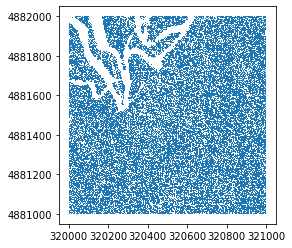

In [3]:
g.plot()

In [4]:
#a numeric column to count
g["mask"] = 1

In [11]:
cube = make_geocube(vector_data=g, resolution=(-50, 50),group_by="mask.count()")

KeyError: 'mask.count()'

In [6]:
cube

<xarray.Dataset>
Dimensions:      (x: 20, y: 20)
Coordinates:
  * y            (y) float64 4.882e+06 4.882e+06 ... 4.881e+06 4.881e+06
  * x            (x) float64 3.2e+05 3.201e+05 3.201e+05 ... 3.209e+05 3.21e+05
    spatial_ref  int64 0
Data variables:
    left         (y, x) float64 nan 3.201e+05 nan ... 3.209e+05 3.209e+05 nan
    bottom       (y, x) float64 nan 4.882e+06 nan ... 4.881e+06 4.881e+06 nan
    right        (y, x) float64 nan 3.201e+05 nan ... 3.209e+05 3.209e+05 nan
    top          (y, x) float64 nan 4.882e+06 nan ... 4.881e+06 4.881e+06 nan
    height       (y, x) float64 nan 7.971 nan 8.757 ... 22.54 25.37 16.84 nan
    area         (y, x) float64 nan 23.03 nan 16.65 ... 40.95 18.86 20.7 nan
    mask         (y, x) float64 nan 1.0 nan 1.0 1.0 1.0 ... nan 1.0 1.0 1.0 nan
Attributes:
    grid_mapping:  spatial_ref

In [7]:
cube.groupby("mask").count()

<xarray.Dataset>
Dimensions:      (mask: 1)
Coordinates:
    spatial_ref  int64 0
  * mask         (mask) float64 1.0
Data variables:
    left         (mask) int64 266
    bottom       (mask) int64 266
    right        (mask) int64 266
    top          (mask) int64 266
    height       (mask) int64 266
    area         (mask) int64 266

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([265.5, 265.6, 265.7, 265.8, 265.9, 266. , 266.1, 266.2, 266.3,
        266.4, 266.5]),
 <a list of 10 Patch objects>)

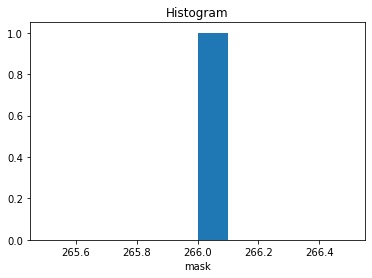

In [8]:
cube.mask.count().plot()